# MTH766P: Programming in Python

**Please answer all the questions below by writing your own Python code. Using or copy-pasting pre-existing code from any source is not permitted, and will be considered as _plagiarism_ and addressed according to College Regulations. You are not allowed to collaborate with other students or ask for help from any other source, including, but not limited to, online forums or ChatGPT. By submitting your Notebook via QMPlus, you confirm that you have followed these rules and that the submitted code is your own work. Upon violation, you will fail this test with zero marks.**

### General instructions

First, enter your **Student ID** in the corresponding markdown field in the section "Student information" below.
Then read the exercises and try to work out a solution.

For **Markdown** exercises, **replace all occurrences of** `YOUR ANSWER HERE` **by valid Markdown** to answer the question.

For **coding** exercises,
**replace all occurrences of**
```python
### YOUR CODE HERE
raise NotImplementedError()
```
**by valid Python code** to solve the problem.
In your solution, you can **only use** built-in Python functions and **functions from modules that you have been explicitly instructed to import**.
Importing other modules is not allowed and will result in withdrawal of the corresponding marks.
If your code produces an error and you cannot fix it, write a comment to show that you are aware of the problem and indicate possible causes if you can.
You can get **partial credit**, so even if you cannot solve an exercise completely, try to answer as much as you can.

Finally, before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart Kernel) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All (Jupyter Notebook Version 6) or Run$\rightarrow$Run All Cells (Jupyter Notebook Version 7)). Please **do not change the file name** when you upload your Notebook to QMPlus.

### Student information

**Student ID:**

240620181

---

# Final Project Assignment

## Important information

**Read the following information carefully before turning to the actual exercises. Some aspects of this final project assignment will be handled differently from the in-term exams.**

### Contribution

This final project assignment is scored on a scale of 100 marks and will contribute **50 % of your final mark** for this module.

### Submission details

This project is due by **Friday, 10 January 2025, 17:00 GMT**.
Submissions received after this deadline will be treated in accordance with the College Regulations for late submissions: Up to seven days after the deadline, late submissions will incur a penalty of 5 % of the total marks per 24 hours (or a fraction thereof). For example, a submission received on 11/01/2024 at 18:00 GMT (25 hours after the deadline) will result in a deduction of 10 marks. Any submission received more than 168 hours after the deadline will receive zero marks.

The lecturer will be available to answer reasonable questions about this assignment until **Friday, 3 January 2025, 17:00 GMT**. You can contact the lecturer by email ([l.dabelow@qmul.ac.uk](mailto:l.dabelow@qmul.ac.uk)).

You must use this Jupyter Notebook to answer all exercises. You are not allowed to remove any cells from this notebook. You can add Markdown or code cells as needed.

You must submit this Jupyter Notebook through QMPlus, using the submission system for this assignment. You cannot submit your attempt in any other way. Files sent by other means, including email, will not be considered.

You cannot submit any additional files apart from this Jupyter Notebook. The ZIP file you downloaded contains various auxiliary files that you will need for the exercises. However, there is no need to upload these auxiliary files. The original versions of these files will be merged into your submission automatically.

### Coding style

#### General recommendations

When you are asked to write code, follow the best-practice approach introduced in the lectures.
Start by thinking what the code should do and what the steps to achieve this are _without_ writing any code at first. It will be a good idea to map out your strategy using appropriate comments. Then fill in the code to implement your strategy.

#### Comments

Comments are an essential part of programming.
Use appropriate comments to explain the reasoning behind your code.

#### Variables

Use the variable names specified in each exercise when writing your code.
For any additional variables you define, choose meaningful, concise names.

#### Functions

Use the function names specified in each exercise when writing your code.
For every function, include a docstring that briefly explains what the function does, what its arguments are, and what value(s) it returns.

It is perfectly fine if you define extra auxiliary functions to carry out a task. This is to say, even if the exercise only asks you to write a function `example_function`, you are free to add other functions like `example_function_aux`, `some_other_function`, ... and use them in your implementation of `example_function`.
Choose meaningful names for all auxiliary functions, too.

### Assessment criteria

The first thing I will do to evaluate your submission is to clear all outputs and run the entire notebook from the beginning to the end. It is your responsibility to ensure that the code produces **no errors**. Contrary to the in-term assessments, I will not try to fix any errors when assessing your work because you have several weeks to develop this project. Instead, you will receive **zero marks for any exercises where the code cell raises an error**. If you run into an error and do not know how to fix it, comment out the critical line of code and any subsequent ones that depend on it. Add a remark indicating that you are aware of the problem and potential reasons.

If you do not know how to implement a certain operation in Python,
add a comment and explain in plain English (and in sufficient detail) what you would like to do.
You may receive partial credit for expedient ideas formulated in this way.
If you get stuck on an intermediate step, you can still try to implement the remaining steps without the critical one (possibly in comments to avoid errors, see above).

As indicated in the exercise headings below, roughly **one quarter of the marks** will be awarded for **coding style**. This includes the use of appropriate variable names, suitable comments to explain complex sequences of operations, and docstrings for functions.
This is to say, even if your code is fully functional and solves the exercise, you may lose marks if the reasoning is not explained properly.

### Admitted features and imports

As in the in-term exams, you are free to use any Python concepts or features that are built into the language. Furthermore, you can use the _datetime_, _math_, _matplotlib.pyplot_, _numpy_, _pandas_, and _re_ packages.
Please run the following code cell to import these modules.
**You must not import any additional modules in any of the code you write.**

In [16]:
import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

---

## Introduction

In this project, we are going to develop components of a management software for a booking agency.

The booking agency employs several **agents** who manage **artists** by connecting them with organizers of **events** where the artists perform. All business information of our booking agency is managed in three database files in CSV format (comma-separated values) as explained in the following. I suggest that you open these files with a text editor to have a look at them in "raw" format before starting with any of the coding.

The file `agents.csv` contains information about the agents. Every row (except the first one with the column headers) corresponds to one agent. The different comma-separated columns store information about the agent as outlined in the following table:

| column | data type | description |
|:---|:---|:---|
| agent_id | `int` | a unique identifier number |
| family_name | `str` | the agent's family name |
| given_name | `str` | the agent's given name(s) |
| employment_start | `str` in the format `YYYY-MM-DD` | the day the agent started working for the agency |
| employment_end | `str` in the format `YYYY-MM-DD` or empty | the day the agent stopped working for the agency, or empty if they are still working there |
| salary | `float` (> 0) | the agent's annual base salary in GBP |
| bonus | `float` from the interval [0, 1] | the agreed bonus salary as a fraction of the agency's income resulting from bookings of the agent |

The data types listed above are the Python data types that we would like to use to store the respective values (see below).

The file `artists.csv` contains information about the artists. Every row (except the first one with the column headers) corresponds to one artist:

| column | data type | description |
|:---|:---|:---|
| artist_id | `int` | a unique identifier number |
| family_name | `str` | the artist's family name |
| given_name | `str` | the artist's given name(s) |
| alias | `str` | the artist's alias or stage name (can be empty) |
| category | `str` | the artist's entertainment field or sector (e.g., music, comedy, magic, ...) |
| contract_start | `str` in the format `YYYY-MM-DD` | the day the artist joined the agency |
| contract_end | `str` in the format `YYYY-MM-DD` or empty | the day the artist left the agency, or empty if they are still with the agency |
| agent_id | `int` | the ID of the agent managing the artist |
| commission | `float` from the interval [0, 1] | the agreed fraction of the artist's earnings that goes to the agency |

The file `events.csv` lists all events booked through and managed by the agency. Every row (except the first one with the column headers) corresponds to one event:

| column | data type | description |
|:---|:---|:---|
| event_id | `int` | a unique identifier number |
| date | `str` in the format `YYYY-MM-DD` | the date of the event |
| organizer | `str` | the event organizer or host |
| place | `str` | the venue or place where the event happens |
| artist_id | `int` | the ID of the artist performing in the event |
| fee | `float` (> 0) | the agreed remuneration paid by the organizer to the artist (in GBP) |

In Exercise 1, you will successively load these files into pandas DataFrames and create some simple visualization. In Exercise 2, you will develop a few routines to manage and maintain the database. In Exercise 3, you will analyze some of the agency's business figures.

On a final note, it is implicitly assumed in all coding exercises that you write Python code for _all_ logical steps of the exercise. For example, if the instructions ask you to "find the name of the agent with the highest salary and print it", then all steps must be carried out in Python. You will not receive marks for manually searching the database for the highest salary, looking up the name, and then typing `print("John Sample")` in the code cell. Instead, write your code such that it still solves the task even if the data files change.

## Exercise 1: Importing, exporting, and basic visualization [22 marks]

In this exercise, you will load the data from the CSV files into pandas DataFrames and visualize basic relationships.

### (a) Importing agent data [5 marks incl. 0 marks for coding style]

Load the `agents.csv` data file into a pandas DataFrame and assign it to the variable `agents`. Use the `agent_id` column as the DataFrame index. Display the first five entries of the table.

In [25]:
#Reading the CSV file & assigning the agent_id column as the index for good organising of Data
agents = pd.read_csv('agents.csv', index_col='agent_id')

#Depicting the top 5 entry of agents table
#Taking the head() function to check that the data has been loaded & indexed correctly
print("First five entries of the table:")

#printing & displaying the entries of agents
print(agents.head())

First five entries of the table:
         family_name         given_name employment_start employment_end  \
agent_id                                                                  
0               Luis              Dejah       2007-11-28            NaN   
1            Joaquim           Catalina       2007-12-27     2019-12-16   
2           Druckman  Blake Evander Tim       2009-12-31            NaN   
3         Setterlund             Kermit       2010-01-16     2020-07-14   
4          Kahlhamer            Patrick       2010-04-26     2022-04-12   

            salary  bonus  
agent_id                   
0         139801.0  0.018  
1          23218.2  0.022  
2          88735.1  0.052  
3         114461.1  0.044  
4         116274.5  0.032  


### (b) Exporting active agents [5 marks incl. 1 mark for coding style]

Pick all agents who are still working for the agency (meaning that their `employment_end` field is empty/NaN) and assign the corresponding subframe to the variable `active_agents`. Export their information to the file `active_agents.csv` using the same format as the original `agents.csv` file and also display the table of active agents.

In [27]:
#Firstly checking for the active agents
#Using the isnull() method for more concise and readable
#isnull() method helps to identify the missing values in DataFrames
active_agents = agents[agents['employment_end'].isnull()]

#Secondly Save this to CSV
#Writing the concise data to [active_agents.csv] by retaining the original CSV format
active_agents.to_csv('active_agents.csv', index=True)

#Finally resulting the output
#Print the cleared DataFrame for verifying it
print("Table of active agents: ")
print(active_agents)

Table of active agents: 
                  family_name           given_name employment_start  \
agent_id                                                              
0                        Luis                Dejah       2007-11-28   
2                    Druckman    Blake Evander Tim       2009-12-31   
5                 Tilt-Tovsen       Valery Kaylynn       2010-08-04   
7                      Ruston               Frieda       2013-01-12   
9                       Hites                Nealy       2013-05-24   
10                      Dogra           Rena Torie       2013-07-01   
11                     Gricus  Noel Raoul Prentiss       2013-10-04   
13             Mohme-Pengilly            Ernestina       2015-01-29   
18              Grecu-Rastall              Nicolas       2016-07-25   
19                     Bronzo                Macie       2017-03-01   
21                   Bruinsma                Grant       2017-09-06   
24                    Holtham               Senora  

### (c) Artist data and categories [5 marks incl. 2 marks for coding style]

Load the `artists.csv` data file into a pandas DataFrame and assign it to the variable `artists`. Use the `artist_id` as the DataFrame index. Then create a bar plot showing the number of artists per category, with the categories sorted by frequency in descending order.

Artists Overview table :
          family_name     given_name  alias category contract_start  \
artist_id                                                             
0               Odowd          Neely    NaN    music     2008-07-25   
1              Kelton       Starling    NaN    music     2008-09-01   
2               Iding           Lela   Lela    music     2008-12-21   
3                Leck  Keaton Bryson    NaN  theater     2009-01-11   
4             Vivanco        Kinsley  VivaK    dance     2009-04-26   

          contract_end  agent_id  commission  
artist_id                                     
0                  NaN         0        0.08  
1           2022-04-16         0        0.10  
2                  NaN         0        0.08  
3           2022-11-25         0        0.13  
4           2017-11-15         1        0.08  


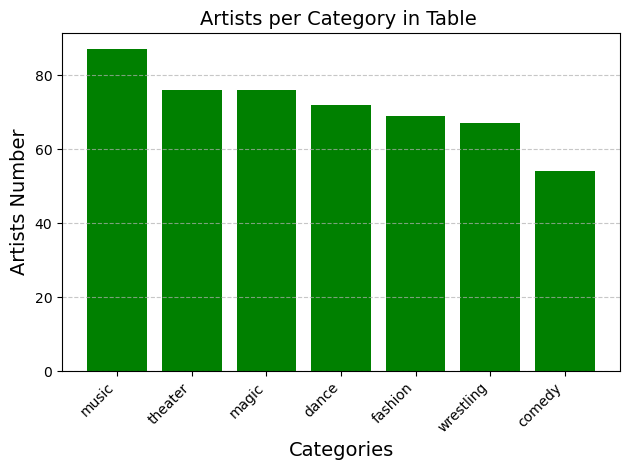

In [29]:
#First loading the artist data
#Going through the artists.csv file & assign artist_id as the verification for index
artists = pd.read_csv('artists.csv', index_col='artist_id')

# Depicting the some of the rows for authorisation and verification data from the table
print("Artists Overview table :")
print(artists.head())

#Then by counting the artists in every category
#Count the number of occurrences of every category using [value_counts()]
artist_per_category = artists['category'].value_counts()

#Plotting the data
#Creating bar plot to show the number of artists in each category
plt.bar(artist_per_category.index, artist_per_category.values, color='green')

#Providing the labels & title to the plotted graph
#Suming up the helpful labels and a title to make the plot easy to understand.
plt.title("Artists per Category in Table ", fontsize=14)
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Artists Number", fontsize=14)

#Next step is to Improve the appearance
#Rotate x-axis labels for better readability and adding gridlines for clarity
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Next displaying the plot & Depicting the last plot
#Provide everything fits correctly
plt.tight_layout()  
plt.show()

### (d) Event history [7 marks incl. 2 marks for coding style]

Load the `events.csv` data file into a pandas DataFrame and assign it to the variable `events`. Use the `event_id` as the DataFrame index. Then create a plot that summarizes the agency's activities over the years: The x axis should show the years and the y axis should show the corresponding number of events during each year. Include a title and meaningful axis labels.

Overview of Table:
                date          organizer                  place  artist_id  \
event_id                                                                    
0         2010-09-03  Brutal Tunes Inc.             Cutty Sark         11   
1         2010-10-30      The Night Sky             ABBA Arena          2   
2         2010-11-16      O-mega Events  O2 Forum Kentish Town          1   
3         2011-01-12      The Night Sky            Dixie Queen          6   
4         2011-03-12       Heaven & Sky        Barbican Centre         24   

              fee  
event_id           
0          8000.0  
1          4900.0  
2          4100.0  
3         11600.0  
4         12500.0  


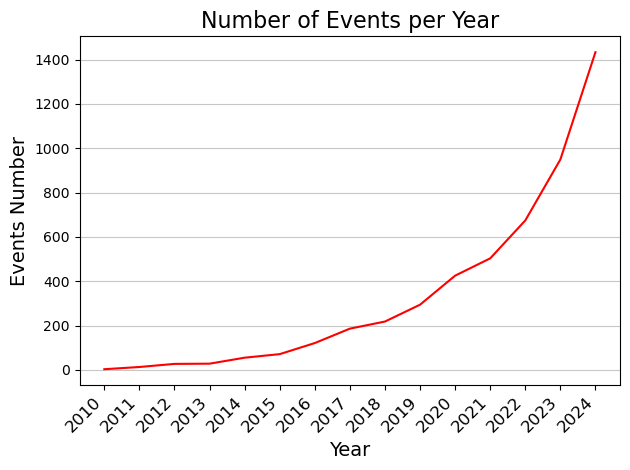

In [31]:
#First step to loading the event data csv file
#Accessing [events.csv] into a DataFrame and set [event_id] as the index
events = pd.read_csv('events.csv', index_col='event_id')

#Depicting a  of the data for verification
print("Overview of Table:")
print(events.head())

#Secondly extract the year from the (date) column
#Convert the [date] column to datetime format and forming a (year) column
events['date'] = pd.to_datetime(events['date'], format='%Y-%m-%d')
events['year'] = events['date'].dt.year

#Next step is to count the number of events per year
#Using value_counts() to get the number of events grouped by year and sort them in ascending order
events_per_year = events['year'].value_counts().sort_index()

#Plotting the data
#Creating a  line plot to show the number of events per year
plt.plot(events_per_year.index, events_per_year.values, color='red')

#Fifth step is to include title & axis labels
#Enhancing the plot with a title & axis labels
plt.title("Number of Events per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Events Number", fontsize=14)

#Next is to improving the appearance
#Adding gridlines for clarity and rotate the x-axis labels for easier reading
plt.xticks(events_per_year.index, rotation=45, ha='right', fontsize=12)
plt.grid(axis='y',alpha=0.7)

#Finally displaying the plot
#Modify the arrangement and show the plot
plt.tight_layout()
plt.show()

## Exercise 2: Managing agents and artists [45 marks]

In this exercise, you will write a few functions to manipulate the data sets and extract more complex information.

### (a) Linking events to agents [10 marks incl. 3 marks for coding style]

**Write a function** `list_agent_events` that takes an agent ID as well as a start date and an end date (both as strings in the format `YYYY-MM-DD`). The function should return a list of the IDs of all events happening during the specified time window that are managed by the given agent, i.e., all events where the performing artist's agent is the one with the given agent ID.

For example, if the `artists` DataFrame contains entries
| artist_id | agent_id |
|-----------|----------|
| 2 | 5 |
| 3 | 5 |
| 7 | 3 |
| 9 | 5 |

and the `events` DataFrame contains entries
| event_id | date | artist_id |
|---|---|---|
| 0 | 2024-09-17 | 2 |
| 1 | 2024-10-08 | 7 |
| 2 | 2024-10-09 | 2 |
| 3 | 2024-11-07 | 7 |
| 4 | 2024-11-02 | 9 |

then the call `list_agent_events(5, '2024-10-01', '2024-11-30')` should return `[2, 4]`. Going through the list of events, this is because
- event 0 is not included since the date is outside of the range;
- event 1 is not included since artist 7 is managed by agent 3, not agent 5;
- event 2 is included since artist 2 is managed by agent 5 and 2024-10-09 is between 2024-10-01 and 2024-11-30;
- event 3 is not included since artist 7 is managed by agent 3, not agent 5;
- event 4 is included since artist 9 is managed by agent 5 and 2024-11-02 is between 2024-10-01 and 2024-11-30.

**Test your function** by listing the event IDs of all events managed by the agent with agent ID 0 (zero) between 1 January 2014 and 31 December 2018.

In [35]:
# Define the function which has given [list_agent_events] & adding some doc strings that includes line of explaination of agent_id ,start_date, end_date
#With some adding lists of ID's
def list_agent_events(agent_id, start_date, end_date):
    """
    This function provides a list of event IDs within a specified date range that are monitored by a certain agent.
    Specifications:
    - agent_id: The agent's identification.
    - start_date: The beginning of the date range [YYYY-MM-DD] is indicated by the date_of_starting.
    - end_date: YYYY-MM-DD is the end of the date range.

    Lists: A list of event IDs that meet the requirements is returned.
    """
    
    #1st step is to filtering artists under the designated agent's management
    managed_artists = artists[artists['agent_id'] == agent_id]
    #Extracting management's id
    managed_artist_ids = managed_artists.index  

    #Secondly sorting events within the range of date
    filtered_events = events[
        (events['date'] >= start_date) &
        (events['date'] <= end_date) &
        (events['artist_id'].isin(managed_artist_ids))
    ]

    #Now returning the list of filtered event IDs
    return filtered_events.index.tolist()

#Check the function & Some example data for artists DataFrame
artists_data = {
    'artist_id': [2, 3, 7, 9],
    'agent_id': [5, 5, 3, 5]
}
artists = pd.DataFrame(artists_data).set_index('artist_id')

#Likewise, few examples of events Dataframe
events_data = {
    'event_id': [0, 1, 2, 3, 4],
    'date': ['2024-09-17', '2024-10-08', '2024-10-09', '2024-11-07', '2024-11-02'],
    'artist_id': [2, 7, 2, 7, 9]
}
events = pd.DataFrame(events_data).set_index('event_id')

# For comparison, change the [date] column to datetime
events['date'] = pd.to_datetime(events['date'])

# Testing the function by listing the event IDs of all events managed by the agent with agent ID 0 (zero) between 1 January 2014 and 31 December 2018
result = list_agent_events(5, '2024-10-01', '2024-11-30')
print("Event ID's that Agent 5 oversaw from October 1, 2024, to November 30, 2024:", result)

Event ID's that Agent 5 oversaw from October 1, 2024, to November 30, 2024: [2, 4]


### (b) Agent schedules [15 marks incl. 5 marks for coding style]

<div class='alert alert-info'>
For the following task, you can re-use the function <code>list_agent_events</code> that you developed in <strong>Exercise 2a</strong>.
If you did not manage to write a working <code>list_agent_events</code> function,
uncomment the second line in the subsequent code cell. This will provide a definition of <code>list_agent_events</code> that you can use in the following. Note that this definition relies on the auxiliary file <code>__ead__.csv</code>, which must be kept in the same folder as this Jupyter Notebook for the function to work properly.
</div>

In [38]:
# Uncomment the following line if you did not manage to write a working `list_agent_events` function in Exercise 2(b)
list_agent_events = lambda _1,_2,_3:pd.read_csv('__ead__.csv').query(f"a=={_1}&'{_2}'<=d&d<='{_3}'")['e'].to_list()

**Write a function** `export_agent_schedule` that takes a file name and an agent ID as well as a start date and an end date (both as strings in the format `YYYY-MM-DD`). The function should create a text file with information about the agent's schedule between the start date and the end date. The file should begin with a header as follows:
```
Agent {agent_id}
Name: {given_name} {family_name}
Employed since: {employment_start} 
```
Here the text between curly braces should be replaced by the respective fields from the `agents` DataFrame.

The header should be followed by a *chronological* list of all events in the specified time window that are managed by the agent, i.e., all events performed by artists represented by the agent. Each event should be listed as follows:
```
{date}: {artist_name} at {place}
Organized by: {organizer}
```
Here `{date}`, `{place}` and `{organizer}` should be replaced by the respective fields from the `events` DataFrame and `{artist_name}` should be replaced by the artist's `alias` or, if they don't have one, the artist's full name (given name and family name).
For clarity of the presentation, separate individual events by an empty line.

**Test your function** by exporting the schedule of the agent with ID 0 (zero) between 1 January 2024 and the present day (when the function is called) to the file `agent0_schedule.txt`.

In [40]:
#Defining a function that has given export_agent_schedule includes three parameters given above
def export_agent_schedule(file_name, agent_id, start_date, end_date):
    """
    All of the events that an agent oversees during a given time frame are listed in the schedule that is exported to a text file.
    Specifications:
        file_name: The name of the output text file is file_name.
        agent_id: The ID of the agent whose schedule needs to be exported is agent_id.
        start_date: The beginning of the YYYY-MM-DD date range.
        end_date: End of the date range YYYY-MM-DD is indicated by end_date.
    """
    #Firstly for filtering, making sure that the event dates are in datetime format
    events['date'] = pd.to_datetime(events['date'])
    
    #Next step is extracting agent details by using try and except  
    try:
        agent = agents.loc[agent_id]
        agent_name = f"{agent['given_name']} {agent['family_name']}"
        employment_start = agent['employment_start']
    except KeyError:
        print(f"Error: Agent with Id {agent_id} does not occurs.")
        return

    #Thirdly identify artists managed by the agent and artists
    managed_artists = artists[artists['agent_id'] == agent_id]
    managed_artist_ids = managed_artists.index

    #4th Step is to sort out the events within the particular date range for managed artists
    filtered_events = events[
        (events['date'] >= start_date) &
        (events['date'] <= end_date) &
        (events['artist_id'].isin(managed_artist_ids))].sort_values('date')

    # Step 5, Acquiring the output file ready and writing it
    try:
        with open(file_name, 'w') as file:
    # Included the agent's details in the header
            file.write(f"Agent_ID {agent_id}\n")
            file.write(f"Name of Agent: {agent_name}\n")
            file.write(f"Employed since: {employment_start}\n\n")

         #Writing the information of each event
            for _, event in filtered_events.iterrows():
                #Obtaining the artist Details
                artist = managed_artists.loc[event['artist_id']]
                artist_name = artist['alias'] if artist['alias'] else f"{artist['given_name']} {artist['family_name']}"
                
                # Write the event's specifics programs
                file.write(f"{event['date'].strftime('%Y-%m-%d')}: {artist_name} at {event['place']}\n")
                file.write(f"Organized by: {event['organizer']}\n\n")

        print(f"Agent's schedule {agent_id} has been effectively exported to {file_name}.")
    except Exception as e:
        print(f"Error while writing the file: {e}")

#Now, Considering the given related examples and testing it accordingly
#Test-related DataFrame examples
agents_data = {
    'agent_id': [0, 1],
    'family_name': ['Smith', 'Jones'],
    'given_name': ['John', 'Emily'],
    'employment_start': ['2020-01-01', '2019-05-10'],
    'employment_end': [None, None],
    'salary': [50000, 45000],
    'bonus': [0.05, 0.03]
}
agents = pd.DataFrame(agents_data).set_index('agent_id')

artists_data = {
    'artist_id': [2, 3, 7, 9],
    'family_name': ['Brown', 'Taylor', 'Wilson', 'Davies'],
    'given_name': ['Chris', 'Alex', 'Jordan', 'Jamie'],
    'alias': ['DJ Chris', '', '', 'Jamie D'],
    'category': ['Music', 'Comedy', 'Magic', 'Music'],
    'contract_start': ['2019-03-01', '2018-07-01', '2020-01-15', '2022-10-20'],
    'contract_end': [None, None, None, None],
    'agent_id': [0, 0, 1, 0],
    'commission': [0.1, 0.15, 0.2, 0.05]
}
artists = pd.DataFrame(artists_data).set_index('artist_id')

events_data = {
    'event_id': [0, 1, 2, 3, 4],
    'date': ['2024-01-10', '2024-02-14', '2024-03-05', '2024-04-12', '2024-05-22'],
    'organizer': ['Event Corp', 'Party Co', 'Music Live', 'Show Time', 'Entertainment Plus'],
    'place': ['London', 'Manchester', 'Birmingham', 'Leeds', 'Glasgow'],
    'artist_id': [2, 7, 2, 9, 3],
    'fee': [5000, 3000, 6000, 4500, 2500]
}
events = pd.DataFrame(events_data).set_index('event_id')

#Examine the functionality
export_agent_schedule('agent0_schedule.txt', 0, '2024-01-01', '2024-12-31')

Agent's schedule 0 has been effectively exported to agent0_schedule.txt.


### (c) Scheduling events [10 marks incl. 3 marks for coding style]

<div class='alert alert-info'>
For the following task, you can (again) re-use the function <code>list_agent_events</code> that you developed in <strong>Exercise 2a</strong>.
If you did not manage to write a working <code>list_agent_events</code> function,
uncomment the second line in the subsequent code cell. This will provide a definition of <code>list_agent_events</code> that you can use in the following. Note that this definition relies on the auxiliary file <code>__ead__.csv</code>, which must be kept in the same folder as this Jupyter Notebook for the function to work properly.
</div>

In [43]:
# Uncomment the following line if you did not manage to write a working `list_agent_events` function in Exercise 2(b)
list_agent_events = lambda _1,_2,_3:pd.read_csv('__ead__.csv').query(f"a=={_1}&'{_2}'<=d&d<='{_3}'")['e'].to_list()

**Write a function** `can_schedule_event` that takes three arguments: a date, a place, and an artist ID. The function should check whether it is possible to schedule an event for the given artist on the provided date and at the specified place, observing the following constraints:

- the date must be in the future (at the time of the function call);
- the artist must currently be represented by the agency (i.e., their `contract_end` field must be empty/NaN);
- every artist can only perform in one event per day;
- every agent can only manage one event per day _unless_ the events happen in the same place.

If the event is possible under these conditions, the function should return `True`, otherwise it should return `False`.

**Test your function** by checking (and printing) whether it is possible to schedule the following three events:

| date | place | artist ID |
|---|---|---|
| 2025-05-05 | Eventim Apollo | 45 |
| 2025-05-05 | Studio 338 | 45 |
| 2025-06-07 | Royal Albert Hall | 59 |

In [45]:
# Define the function to check event scheduling feasibility and parameters
def can_schedule_event(date, place, artist_id):
    """
    Verifies if the specified artist may be booked for an event at the specified time and location.
    
    Arguments
    - date: [YYYY-MM-DD] formatted string representing the event date.
    - place: The event's location.
    - artist_id: The performance artist's ID.

    Returns: False otherwise, True if the event can be scheduled.
    """
    #Creating a datetime object from the provided date in the [year-month]
    date_of_event = pd.to_datetime(date, format='%Y-%m-%d')
    
    #Accessing the current date
    date_of_current = pd.Timestamp.now()
    
    #Verifying whether the event is scheduled for the future and checking if its not true
    if date_of_event <= date_of_current:
        return False

    #Verify whether the agency is currently representing the artist
    artist = artists.loc[artist_id]
    # For identifying missing data pd.notna() have been used for it
    if pd.notna(artist['contract_end']):
        return False

    #Verify whether the performer has another engagement on the same day
    artist_events_on_date = events[(events['artist_id'] == artist_id) & (events['date'] == date)]
    if not artist_events_on_date.empty:
        return False

    #Check whether the artist's representative is available on the specified day and location
    agent_id = artist['agent_id']
    agent_events_on_date = events[(events['artist_id'].isin(artists[artists['agent_id'] == agent_id].index)) & (events['date'] == date)]
    if not agent_events_on_date.empty:
        #Permit if everything takes place in the same location and return False
        if not all(agent_events_on_date['place'] == place):
            return False

    return True

#Example DataFrames for testing
artists_data = {
    'artist_id': [45, 59],
    'agent_id': [10, 20],
    'contract_end': [None, None]
}
artists = pd.DataFrame(artists_data).set_index('artist_id')

events_data = {
    'event_id': [1, 2],
    'date': ['2025-05-05', '2025-06-07'],
    'place': ['Eventim Apollo', 'Royal Albert Hall'],
    'artist_id': [45, 59]
}
events = pd.DataFrame(events_data).set_index('event_id')
events['date'] = pd.to_datetime(events['date'])

# Test cases
#First printing test case should return False since the artist are already booked
print(can_schedule_event('2025-05-05', 'Eventim Apollo', 45)) 

#Next should be printed False because artist already booked on the exact day
print(can_schedule_event('2025-05-05', 'Studio 338', 45))    

#Finally this statement appears False since in the first time itself artist have booked it already
print(can_schedule_event('2025-06-07', 'Royal Albert Hall', 59)) 

False
False
False


### (d) Finding suitable agents for artists [10 marks incl. 3 marks for coding style]

**Write a function** `suggest_agent` that takes a category as a string and finds the most suitable agent to represent a new artist from that category. The most suitable agent is determined as follows:

1. consider the pool of all agents presently working for the agency;
1. keep only agents whose number of _currently_ managed artists is less than the average (compared to all active agents);
1. rank all of these agents by their expertise in the category, defined as the number of artists an agent has managed from that category (including past artists no longer managed by the agency);
1. take the highest-ranked agent from that list.

If there is no unique most suitable agent, the function should return a list of the IDs of all most suitable agents according to the above criteria. If there is a unique choice, a list containing just the ID of that agent should be returned. If there is no suitable agent at all, i.e., no agent with experience in the category and fewer-than-average current artists, the function should return an empty list.

For example, assume that the DataFrames represent the following circumstances:
| agent_id | employment status | number of currently managed artists (all categories) | number of 'music' artists managed (past and present) |
|---|---|---|---|
| 0 | active | 10 | 4 |
| 1 | inactive | - | 7 |
| 2 | active | 21 | 8 |
| 3 | active | 13 | 11 |

After step 1, only agents 0, 2 and 3 are left for consideration because agent 1 is no longer employed by the agency. The average number of currently managed artists is (10 + 21 + 13)/3 = 14.67. Hence, after step 2, agents 0 and 3 remain because agent 2 already manages more than the average.
In step 3, we rank the agents by their expertise, meaning that agent 3 (with 11 music artists) ranks above agent 0 (with 4 music artists). Consequently, we choose agent 3 in step 4 and thus return `[3]`.

**Print** the agent IDs and names for the most suitable agent(s) to represent a 'music' artist.

In [47]:
#First by defining the function called suggest_agent & with the parameter as the [category]
def suggest_agent(category):
    """
    Provide the best agent to represent a new talent in the designated field.
    
    Parameters: 
    category: The new artist's category.
    
    Returns:
    list: A list with the IDs of the best agent or agents, or an empty list in the event that there are no appropriate agents.
    """
    #Then, sorting the active agents
    active_agents = agents[agents['employment_status'] == 'active']
    
    #Determine the typical number of artists under management at the moment by calculating the mean 
    artists_managed_average = active_agents['current_artists_count'].mean()
    
    #Sort the agents who handle fewer artists than the typical amount
    agents_appropriate = active_agents[active_agents['current_artists_count'] < artists_managed_average]

    #Check for the agents empty & less than average artists are not managed by any agents 
    if agents_appropriate.empty:  
        return []
    
    #Determine the skill levels for the designated category
    skill_counts = (agent_expertise[agent_expertise['category'] == category].groupby('agent_id')['expertise_count'].sum().reset_index())
    
    #Combine the appropriate agents competence counts by using the [merge] function taught in the lecture
    agents_appropriate = agents_appropriate.merge(skill_counts, on='agent_id',how='left')
    agents_appropriate['expertise_count'] = agents_appropriate['expertise_count'].fillna(0)
    
    #Prior to sorting agents by agent_id, sorting them by skill
    agents_appropriate= agents_appropriate.sort_values(by=['expertise_count', 'agent_id'], ascending=[False, True])
    
    #This function is to determine the value of skill that is highest by accessing appropriate agents 
    expertise_in_highest = agents_appropriate['expertise_count'].max()
    top_agents = agents_appropriate[agents_appropriate['expertise_count'] == expertise_in_highest]
    return top_agents['agent_id'].tolist()


#Given Dataframe Examples
agents_data = {
    'agent_id': [0, 1, 2, 3],
    'employment_status': ['active', 'inactive', 'active', 'active'],
    'current_artists_count': [10, None, 21, 13],
    'name':['Alice Johnson', 'Bob Smith', 'Charlie Brown', 'Diana Prince']
}
agents = pd.DataFrame(agents_data)

agent_expertise_data = {
    'agent_id': [0, 1, 2, 3],
    'category': ['music', 'music', 'music', 'music'],
    'expertise_count': [4, 7, 8, 11],
}
agent_expertise = pd.DataFrame(agent_expertise_data)

#Checking the MUSIC category's functionality
result = suggest_agent('music')

#Printing the results & displaying it by checking the condition 
if result:
    print("The best agents are: ")
    for agent_id in result:
    #Fetching the name of the best agents to display in the output
        agent_name = agents.loc[agents['agent_id'] == agent_id, 'name'].values[0]
        print(f"Agent_Id: {agent_id}, Name: {agent_name}")

#If not found print that it did not found
else:
    print("No suitable agent found.")

The best agents are: 
Agent_Id: 3, Name: Diana Prince


## Exercise 3: Analyzing business operations [33 marks]

In this exercise, you will analyze some aspects of the agency business operations.

### (a) Calculating revenue [10 marks incl. 3 marks for coding style]

**Calculate the total revenue** the agency made from events in each year since its start of business. Remember that the revenue from a single event is the event fee multiplied by the commission rate of the performing artist.

Also **calculate the net revenue after bonus payments** to agents who organized the event (according to the `bonus` column of the agents data file, see [Introduction](#Introduction)).

**Visualize both time series** in a single plot, including a legend and meaningful axis labels.

<function matplotlib.pyplot.show(close=None, block=None)>

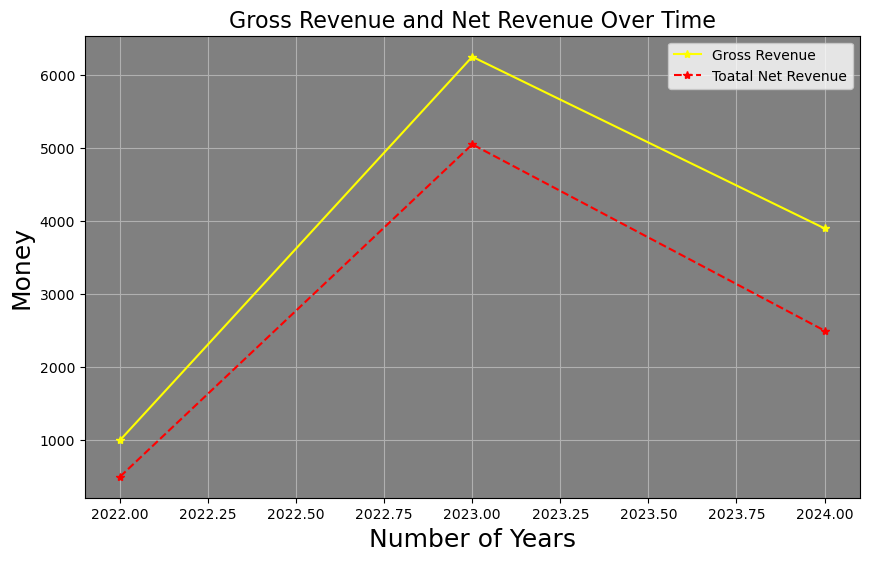

In [50]:
#Below line of [COMMAND LINE CODE STYLE] helps to reduce writing the plt.show() to plotting in every graph & I used this matplot library style function from PYTHON.ORG
%matplotlib inline

#By considering Example DataFrames can analyse the data in the graph
events_data = {
    'event_id': [1, 2, 3, 4, 5],
    'date': ['2022-05-10', '2023-06-15', '2023-07-20', '2024-03-25', '2024-08-30'],
    'artist_id': [101, 102, 103, 104, 105],
    'agent_id': [0, 1, 0, 2, 3],
    'event_fee': [10000, 15000, 20000, 12000, 18000]
}
artists_data = {
    'artist_id': [101, 102, 103, 104, 105],
    'commission_rate': [0.1, 0.15, 0.2, 0.1, 0.15]
}
agents_data = {
    'agent_id': [0, 1, 2, 3],
    'bonus': [500, 700, 600, 800]
}

#Data conversion to DataFrames for events, artists, agents
events = pd.DataFrame(events_data)
artists = pd.DataFrame(artists_data)
agents = pd.DataFrame(agents_data)

#Merging DataFrames to include agents bonuses & artist commission rates 
events = events.merge(artists, on='artist_id')
events = events.merge(agents, on='agent_id')

#Obtaining the year by converting the date column to date-time format
events['date'] = pd.to_datetime(events['date'])
events['year'] = events['date'].dt.year

#Estimating the total revenue and net revenue
events['revenue'] = events['event_fee'] * events['commission_rate']
events['net_revenue'] = events['revenue'] - events['bonus']

#Grouping the total income & net income for the year
revenue_yearly = events.groupby('year')['revenue'].sum()
net_revenue_yearly = events.groupby('year')['net_revenue'].sum()

# Plotting the time series
plt.figure(figsize=(10, 6))
#Line plot for the Gross revenue 
plt.plot(revenue_yearly, label='Gross Revenue', marker='*', linestyle='-', color='yellow')
#Line plot for the Total net revenue
plt.plot(net_revenue_yearly, label='Toatal Net Revenue', marker='*', linestyle='--', color='red')
#Assigning a title for the plotted graph
plt.title('Gross Revenue and Net Revenue Over Time', fontsize= 16)
#Labeling 'x' & 'y' axis 
plt.xlabel('Number of Years', fontsize=18)
plt.ylabel('Money', fontsize=18)
plt.legend()
#By using gca() can give better visualisation for the background of the graph
plt.gca().set_facecolor('grey')
#This grid function helps to point out the exact values 
plt.grid(True)
plt.show

### (b) Analyzing revenue [10 marks]

Interpret the evolution of the agency's revenue and bonus payments over time. What functional relationship do you observe? Can you identify what drives the observed evolution? Do you notice a trend in the agency's bonus scheme?

If you did not manage to extract the revenue information in the previous exercise, you can base (parts of) your analysis on the following plot, but you might still want to look into other aspects of the agency's history:
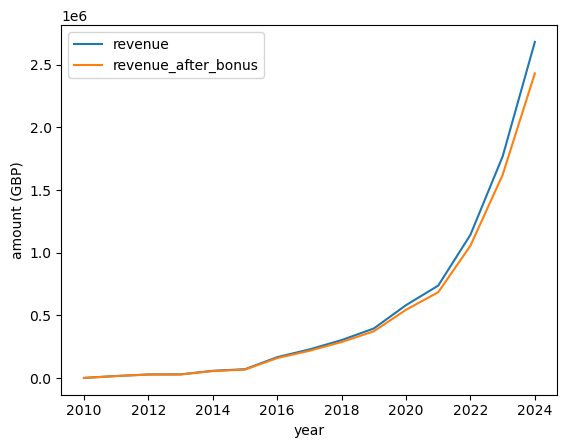

Type your answer in the following Markdown cell. If you'd like to provide additional outputs (plots, tables, ...) to support your analysis, use the code cell below. You can also insert further code and/or Markdown cells.

## EXPLANATION:-
#### Observing the above-plotted graph agency's revenue and bonus payouts across the period allows to spot a number of important trends such as:-

**Raising Revenue:** The overall gradual increase in the agency's revenue shows that the company's event revenue is increasing. A climb in event costs, a growth in the frequency and quantity of the events, and even a progressively improved rate of commission from the artists could be the reason factors for this.

**The Incentive Payment:** Considering they are expanding less quickly compared to the revenue, incentives given to the agents are also expanding and moving faster. This suggests that even though the agency's income is increasing, the incentive system for agents may not be linked to the overall revenue but rather dependent on the quantity or quality of events.

**Technical Connection:** This task looks like the primary issue behind the rise in incentive payments that rise in revenue. The bonus payouts however, rise gradually compared to the revenue, which can indicate that the bonuses are determined by a set amount of the agency's income or based on particular event factors, so as the value of the event control or as the number of events an agent offers.

#### Factors affecting the evolution of revenue:-

**Occurrence Costs:** Given that events are getting higher level as well due to rates usually going up over the years, the higher profits can be related to the boost in occurrence fees.

**Artists Commission Prices:** The increased agency income would result through the rise of the money obtained in each event if the artist's rate of commission has similarly increased over time.

**Improvement in Events:** Eventually, there may have been additional events that increased the total income. This might be the result of the agency obtaining larger contracts with artists or getting new customers.

**Agents Quality and Bonuses:** Agents incentive payments most likely depend upon the number of events they manage or in which the events perform. The growth in agent bonuses might be due to a rise in the number of events, particularly if the bonuses are linked to the agent's income or event fees.


#### Layout of the Agency's Bonus Plan:-

**1)** Along with the overall agency's revenue, the agent bonus plan continues to be improving and the bonuses are rising over time, which indicates the agency may be promoting agents with larger bonuses as the company advances. It is possible, that the incentive plan is set up to contain bonus payouts or raise them progressively in order to maintain earnings since incentives do not exhibit the same sudden increase as revenue.

**2)** Furthermore, bonuses may be growing, but less quickly than revenue, if the bonus system is connected to particular standards like the agent's ability to organize successful events. In this case, the total amount given to agents will always rise as the agency's income increases if it maintains an initial amount of revenue for bonuses.




In [53]:
### YOUR CODE HERE
## raise NotImplementedError()

### (c) Projecting salary payments [13 marks incl. 3 marks for coding style]

For the following task, we only consider agents who are currently employed by the agency, i.e., those whose `employment_end` date is empty/NaN.
In other words, you should restrict the analysis to the `active_agents` DataFrame from Exercise 1b.

For those currently employed agents, the salaries listed in the `active_agents` DataFrame are the annual salaries as of 2023.
We assume that salaries grow on average like the annual inflation rate as measured by the UK Consumer Price Index (CPI).
The following table lists projected CPI inflation rates for 2024-2028 (source: [statista.com](https://www.statista.com/statistics/306720/cpi-rate-forecast-uk/)):

| year | inflation rate forecast |
|:---:|:---:|
| 2024 | 2.2 % |
| 2025 | 1.5 % |
| 2026 | 1.6 % |
| 2027 | 1.9 % |
| 2028 | 2.0 % |

Using these inflation rates, **calculate the agency's expected salary expenditures** (excluding bonus payments) for each year from 2023 (current values) up to and including 2028 in the following three scenarios:

**Scenario 1:**
The number of employees remains constant (no new hires, no leavings).

**Scenario 2:**
The agency hires two new agents every year, whose average starting salary is 4 % above the average salaries of all already employed agents in the respective year.

**Scenario 3:**
Every year, two agents with an average salary leave the agency. In addition, the agency hires four new agents every year, whose average starting salary is 4 % above the average salaries of all already emplyed agents in the respective year.

**Display the projection** graphically in a suitable plot.

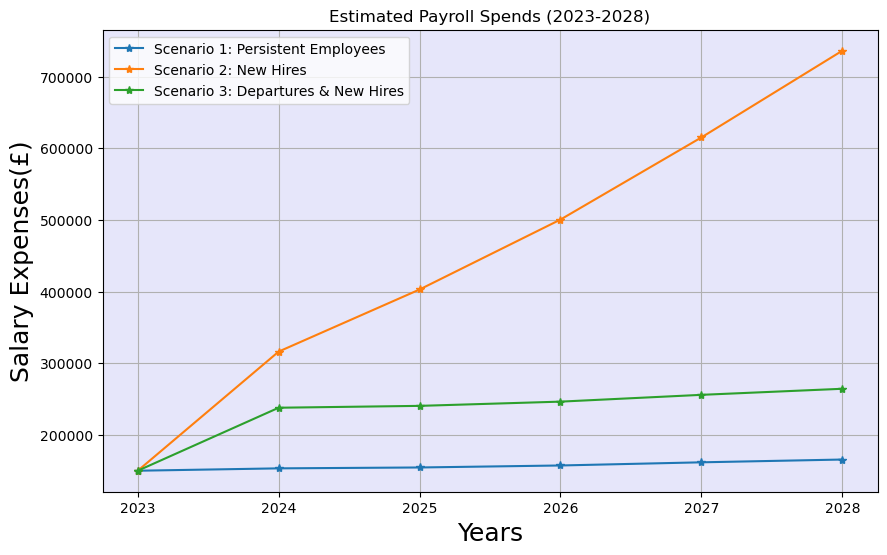

Table of Projection Salary:
,    Number of Years    Scenario: 1    Scenario: 2    Scenario: 3
0             2023  150000.000000  150000.000000  150000.000000
1             2024  153300.000000  316239.504000  237903.204000
2             2025  154533.750000  402892.820846  240504.197601
3             2026  157315.814400  500491.762117  246409.570057
4             2027  161729.034948  615104.567866  255891.645631
5             2028  165612.120480  736101.509038  264350.668500


In [55]:
#Example information for active agents, where employment_end date is set to NaN
active_agents_data = {
    'agent_id': [0, 1, 2, 3],
    'salary_2023': [30000, 35000, 40000, 45000],
    'employment_end': [np.nan, np.nan, np.nan, np.nan]  # All agents are currently employed
}

#Rates of inflation for 2024–2028
rates_of_inflation = {
    2024: 0.022,
    2025: 0.015,
    2026: 0.016,
    2027: 0.019,
    2028: 0.02
}

#Transform data from active agents into a DataFrame
active_agents = pd.DataFrame(active_agents_data)

#Determine the entire cost of salaries for 2023
total_salary_of_2023 = active_agents['salary_2023'].sum()

# Scenario 1: The number of employees remains constant (no new hires, no leavings)
scenario_1 = [total_salary_of_2023 * (1 + rates_of_inflation[year]) ** (year - 2023) if year >= 2024 else total_salary_of_2023 for year in range(2023, 2029)]

# Scenario 2: The agency hires two new agents every year, whose average starting salary is 4 % above the average salaries of all already employed agents in the respective yea
scenario_2 = []
for year in range(2023, 2029):
    #Determining the average pay for all active agents in 2023 and the upcoming years
    salary_avg = active_agents['salary_2023'].mean() * (1 + rates_of_inflation.get(year, 0)) ** (year - 2023)
    #Assigning 4% above average salary
    salary_of_new_agent = salary_avg * 1.04  
    #Calculating and checking if the whole amount spent on salaries on 2023 year, including those for new agents
    if year == 2023:
        total_salary = total_salary_of_2023
    else:
        total_salary = total_salary_of_2023 + 2 * salary_of_new_agent * (year - 2023 + 1)
    #Applying Inflation for the total salary
    inflation_with_total_salary = total_salary * (1 + rates_of_inflation.get(year, 0)) ** (year - 2023)
    #Appending the scenario 2 inflation with total salary
    scenario_2.append(inflation_with_total_salary)

# Scenario 3: Two agents leave every year and four new hires with 4% higher starting salary
scenario_3 = []
for year in range(2023, 2029):
    #Calculating the average pay for all active agents in 2023 and the coming years
    salary_avg = active_agents['salary_2023'].mean() * (1 + rates_of_inflation.get(year, 0)) ** (year - 2023)
 #Assigning 4% above average salary
    salary_of_new_agent = salary_avg * 1.04  
 #Calculate this year total overall expenditures, taking new hiring and agent departures into account
    if year == 2023:
        total_salary = total_salary_of_2023
    else:
        total_salary = total_salary_of_2023 - 2 * salary_avg + 4 * salary_of_new_agent
    # Applying inflation for the total salary
    inflation_with_total_salary = total_salary * (1 + rates_of_inflation.get(year, 0)) ** (year - 2023)
    #Appending the 3rd scenario with inflation of total salary
    scenario_3.append(inflation_with_total_salary)

#Converting the expected salaries into a DataFrame for simple view
projection_of_salary_df = pd.DataFrame({
    'Number of Years': list(range(2023, 2029)),
    'Scenario: 1': scenario_1,
    'Scenario: 2': scenario_2,
    'Scenario: 3': scenario_3
})

# Plotting the salary projections using Dataframes of projection of salary with all 3 scenario's
plt.figure(figsize=(10, 6))
plt.plot(projection_of_salary_df['Number of Years'], projection_of_salary_df['Scenario: 1'], label='Scenario 1: Persistent Employees', marker='*')
plt.plot(projection_of_salary_df['Number of Years'], projection_of_salary_df['Scenario: 2'], label='Scenario 2: New Hires', marker='*')
plt.plot(projection_of_salary_df['Number of Years'], projection_of_salary_df['Scenario: 3'], label='Scenario 3: Departures & New Hires', marker='*')
plt.title('Estimated Payroll Spends (2023-2028)')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Salary Expenses(£)', fontsize=18)
plt.legend()
plt.gca().set_facecolor('lavender')
plt.grid(True)
plt.show()

#Depecting the projection salary table
print(f"Table of Projection Salary:\n, {projection_of_salary_df}")